In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns

sns.set(style='white', palette="Set2", color_codes=False)
sns.set_style("ticks")

%matplotlib inline

In [2]:
conn = sqlite3.connect('data.db')
table1 = "trail3-2024-03-25_20-04-22"
table2 = "time_cnt"
cmd = f'''
SELECT "{table1}".run_id,monitor_tag,workers,tasks_per_trial,trial,"{table1}".app_name,average_time FROM "{table1}"
JOIN "{table2}"
ON '{table1}'.run_id = '{table2}'.run_id
'''
tasks = pd.read_sql_query(cmd, conn)
tasks

,run_id,monitor_tag,workers,tasks_per_trial,trial,app_name,average_time
0,9e1f9e8c-ab16-4d92-a7f5-2911c11d7195,htex,8,100,0,noop,0.000058
1,0f81ad75-f99a-4a34-b6b9-172fedf7ae56,htex,8,100,1,noop,0.000057
2,ecaa9036-df40-4fc1-8708-0110e364db19,htex,8,100,2,noop,0.000056
3,71cf2ce5-ce1f-4f25-b3fb-853e0ce3b635,htex,8,100,0,sleep10ms,0.000057
4,0741c78c-a34d-4363-afd9-1c222f649b48,htex,8,100,1,sleep10ms,0.000057
5,e799fd0e-b9d2-40f6-b3c2-0c625897d505,htex,8,100,2,sleep10ms,0.000056
6,9cb499c9-a29c-4c81-be1c-8c2566dd6ce1,htex,8,100,0,sleep100ms,0.000057
7,04da90a7-ef79-4dd0-ad90-2fd8587a46ea,htex,8,100,1,sleep100ms,0.000054
8,00340e69-a4f7-4995-973e-02ba64129e0b,htex,8,100,2,sleep100ms,0.000060
9,9459f880-1941-4569-b841-efe99ba29e43,htex,64,100,0,noop,0.000056


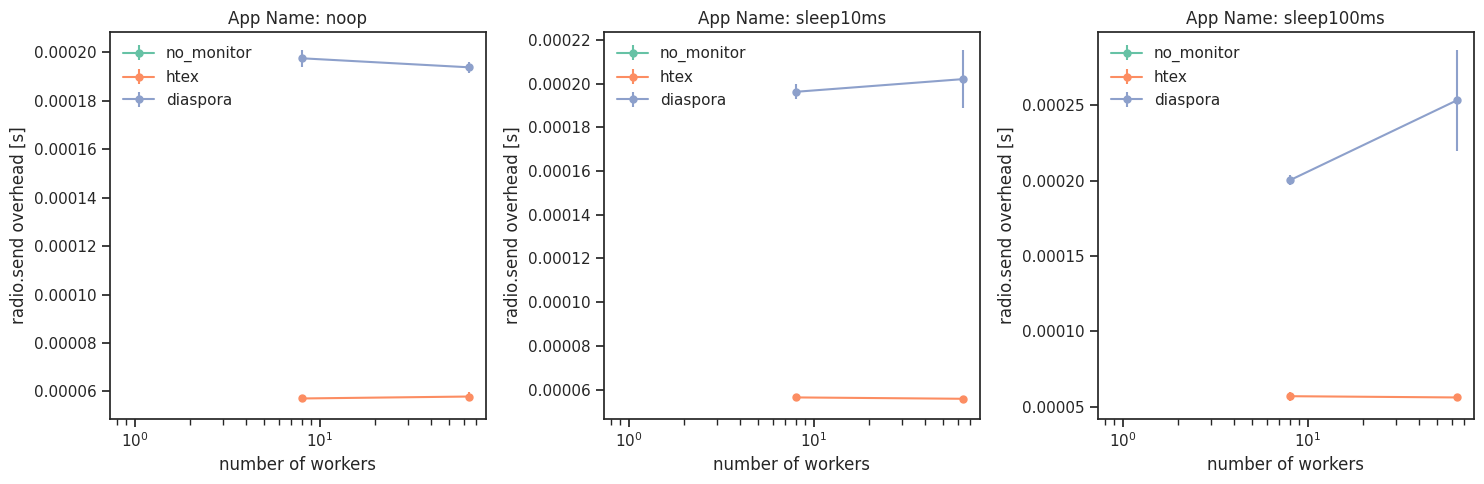

In [3]:
monitor_tags = ['no_monitor', 'htex', 'diaspora']
app_names = ['noop', 'sleep10ms', 'sleep100ms']

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

for i, app_name in enumerate(app_names):
    ax = axs[i]
    for monitor_tag in monitor_tags:
        df = tasks[((tasks['monitor_tag'] == monitor_tag) & (tasks['app_name'] == app_name))]
        df = df.groupby('workers', as_index=False)['average_time']
        means = df.mean()
        standard_deviations = df.std()
        means.plot('workers', 'average_time', marker='o', ms=5, logx=True, yerr=list(standard_deviations['average_time']), label=monitor_tag, ax=ax)
    ax.set_ylabel('radio.send overhead [s]')
    ax.set_xlabel('number of workers')
    ax.legend(frameon=False)
    ax.set_title(f'App Name: {app_name}')

plt.tight_layout()
# plt.savefig(f'{table_name}.pdf')